In [2]:
from tensorflow import keras
from keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train.shape

(60000, 28, 28)

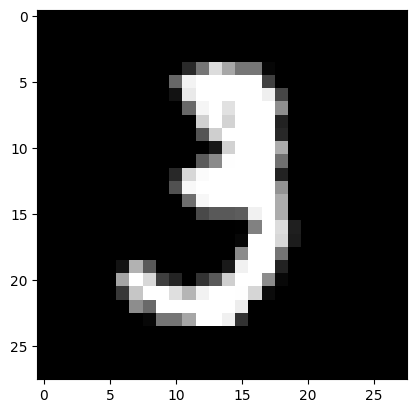

In [5]:
import matplotlib.pyplot as plt
plt.imshow(x_train[10], cmap = 'gray')
plt.show()

# Preprocess

In [6]:
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32')/ 255
x_train.shape

(60000, 28, 28, 1)

# Model Definition

In [8]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(128, kernel_size=(3,3), strides=(1,1), activation='relu', padding='valid', input_shape= (28,28,1)))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.AveragePooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=128, activation='relu'))
model.add(keras.layers.Dense(units=10, activation='softmax'))


In [9]:
import tensorflow as tf

model.compile(optimizer= tf.optimizers.Adam(), loss= tf.losses.sparse_categorical_crossentropy  , metrics=['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 128)         │           1,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d (AveragePooling2D) │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 3, 3, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 1, 1, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 99,050 (386.91 KB)

 Trainable params: 99,050 (386.91 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
hist= model.fit(x_train, y_train, epochs= 10, batch_size = 256, validation_data=(x_test, y_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.6918 - loss: 0.9840 - val_accuracy: 0.9452 - val_loss: 0.1712
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.9496 - loss: 0.1669 - val_accuracy: 0.9685 - val_loss: 0.1059
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9669 - loss: 0.1090 - val_accuracy: 0.9756 - val_loss: 0.0796
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9717 - loss: 0.0940 - val_accuracy: 0.9763 - val_loss: 0.0819
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9775 - loss: 0.0762 - val_accuracy: 0.9784 - val_loss: 0.0702
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9796 - loss: 0.0675 - val_accuracy: 0.9795 - val_loss: 0.0642
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9816 - loss: 0.0583 - val_accuracy: 0.9811 - val_loss: 0.0622
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9841 - loss: 0.0515 - val_ac

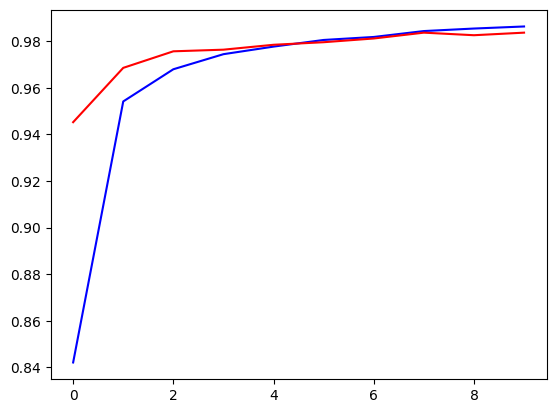

In [12]:
plt.plot(hist.history['accuracy'], color = 'blue')
plt.plot(hist.history['val_accuracy'], color= 'red')